In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import numpy as np

from src.camera import Camera
from src.image_processing_pipeline import ImageProcessingPipeline

In [2]:
camera = Camera.create("camera_cal/calibration*.jpg")
camera.calibrate(load=True)

Text(0.5, 1.0, 'Undistorted Image')

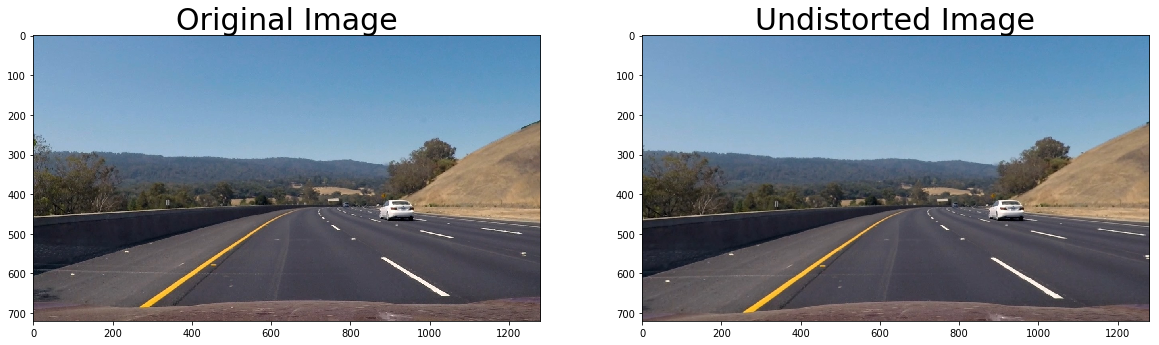

In [14]:
distorted_image = cv2.imread('test_images/test3.jpg')
undistorted_image = camera.undistort(distorted_image)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(cv2.cvtColor(distorted_image, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(cv2.cvtColor(undistorted_image, cv2.COLOR_BGR2RGB))
ax2.set_title('Undistorted Image', fontsize=30)

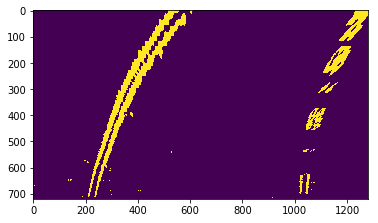

In [15]:
pipeline = ImageProcessingPipeline(camera)

processed = pipeline.process(undistorted_image)

pipeline.sobel_thresh = (20, 120)
pipeline.sobel_kernel = 15
pipeline.mag_thresh = (80, 200)
pipeline.dir_thresh = (np.pi/4, np.pi/2)
pipeline.color_thresh = (0, 255)
pipeline.lane_points = np.float32([[210,720],[595,450],[690,450], [1110, 720]])
pipeline.lane_dest_points = np.float32([[200, 720], [200, 0], [1000, 0], [1000, 720]])

thresholded_warped_image = pipeline.process(distorted_image)

plt.imshow(thresholded_warped_image)

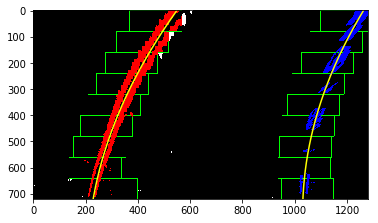

In [16]:
from src.road import Road

road = Road()

road.margin = 100
road.minpix = 50
road.n_windows = 9

plt.imshow(road.process(thresholded_warped_image))